In [60]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve

import warnings
warnings.filterwarnings("ignore")

### Reading Dataset

In [6]:
#uploading dataset
bank = pd.read_csv("bank-full.csv",sep=";")

In [7]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### EDA

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
bank.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

#### Analysis

Text(0.5, 1.0, 'Age count')

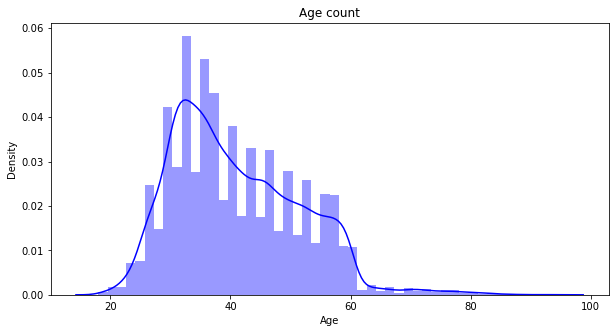

In [64]:
plt.figure(figsize=(10,5))
sns.distplot(bank['age'],color='blue');
plt.xlabel('Age')
plt.title('Age count')

<AxesSubplot:xlabel='y', ylabel='balance'>

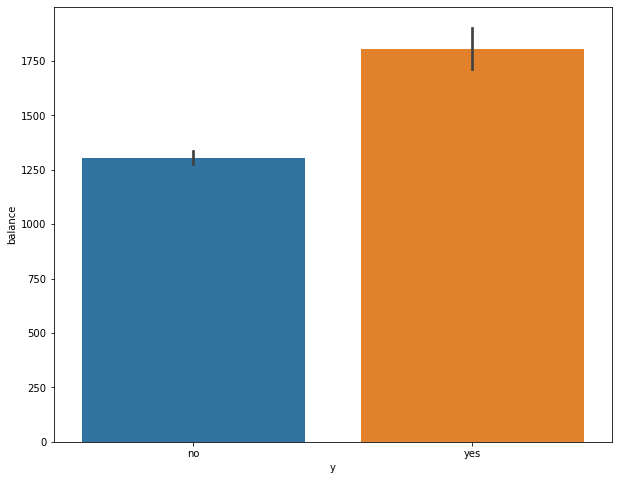

In [86]:
plt.figure(figsize=(10,8))
sns.barplot(x='y',y='balance',data=bank)

<AxesSubplot:xlabel='education', ylabel='balance'>

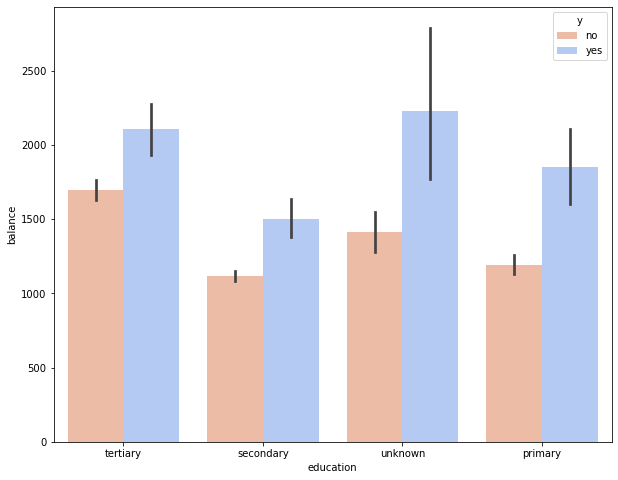

In [97]:
plt.figure(figsize=(10,8))
sns.barplot(x='education',y='balance',hue ='y',data=bank,palette='coolwarm_r')

<AxesSubplot:xlabel='marital', ylabel='balance'>

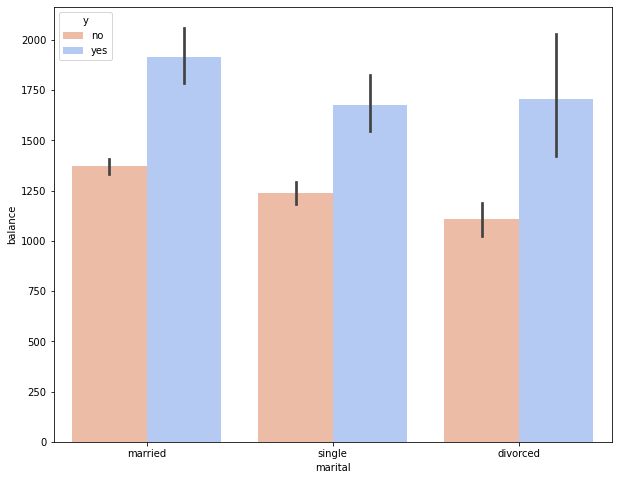

In [98]:
plt.figure(figsize=(10,8))
sns.barplot(x='marital',y='balance',hue ='y',data=bank,palette='coolwarm_r')

<AxesSubplot:xlabel='loan', ylabel='balance'>

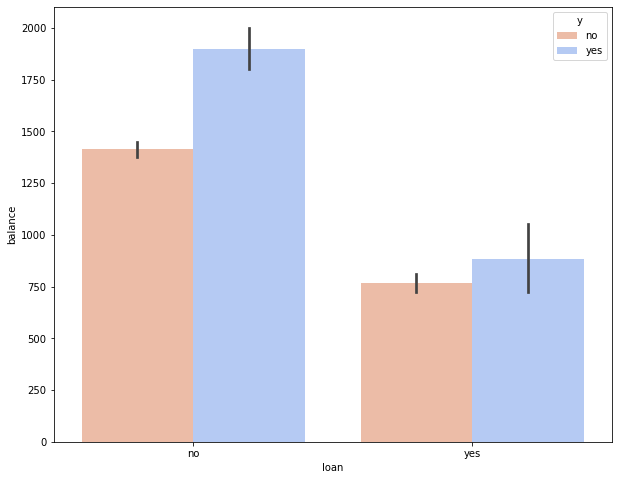

In [100]:
plt.figure(figsize=(10,8))
sns.barplot(x='loan',y='balance',hue ='y',data=bank,palette='coolwarm_r')

#### Data preparation

In [103]:
#factorizing dataset by replacing 
bank.contact.replace(('cellular','unknown','telephone'),(0,1,2),inplace=True)
bank.job.replace(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)
bank.marital.replace(['married', 'single', 'divorced'],[0,1,2],inplace=True)
bank.education.replace(['tertiary', 'secondary', 'unknown', 'primary'],[0,1,2,3],inplace=True)
bank.poutcome.replace(['unknown', 'failure', 'other', 'success'],[0,1,2,3],inplace=True)
bank.default.replace(('yes','no'),(1,0),inplace=True)
bank.housing.replace(('yes','no'),(1,0),inplace=True)
bank.loan.replace(('yes','no'),(1,0),inplace=True)
bank.y.replace(('yes','no'),(1,0),inplace=True)
bank.month.replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],[0,1,2,3,4,5,6,7,8,9,10,11],inplace=True)

#### model preparation

In [104]:
#seperating X and Y 
X = bank.drop("y",axis=1)
Y = bank.y


In [106]:
scaler = StandardScaler()
scaler_x = scaler.fit_transform(X)
# scaler_x = scaler.transform(train_x)

In [107]:
#train teat split
train_x, test_x, train_y, test_y = train_test_split(scaler_x , Y, test_size=0.2,random_state=42,stratify=Y)

In [108]:
test_x

array([[-0.08816664, -0.16981295, -0.74066636, ..., -0.41145311,
        -0.25194037, -0.41528717],
       [ 0.28852927, -0.81532633, -0.74066636, ..., -0.41145311,
        -0.25194037, -0.41528717],
       [-0.93573244,  1.12121381, -0.74066636, ..., -0.41145311,
        -0.25194037, -0.41528717],
       ...,
       [-0.84155846, -0.49256964, -0.74066636, ..., -0.41145311,
        -0.25194037, -0.41528717],
       [-1.97164619,  2.41224057,  0.70245839, ...,  1.41621408,
         1.48461123,  1.01643071],
       [-0.18234062, -1.13808302, -0.74066636, ...,  1.6858699 ,
         0.18219753,  1.01643071]])

In [112]:
logit = LogisticRegression()
logit.fit(train_x, train_y)

LogisticRegression()

In [113]:
logit.score(train_x, train_y)

0.8991650077416501

In [114]:
logit.score(test_x, test_y)

0.8994802609753401

In [115]:
pred = logit.predict(train_x)
pred_test = logit.predict(test_x)

In [116]:
train_y.value_counts()

0    31937
1     4231
Name: y, dtype: int64

#### confusion matrix and model evaluation

In [121]:
confusion_matrix(y_pred=pred_test,y_true=test_y)

array([[7811,  174],
       [ 735,  323]])

In [122]:
print(classification_report(test_y, pred_test))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95      7985
           1       0.65      0.31      0.42      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043



In [123]:
pred_prob = logit.predict_proba(test_x)
prob = pred_prob[:, 1]
Logit_roc_score = roc_auc_score(test_y, logit.predict(test_x))
Logit_roc_score

0.6417510739062964

##### ROC curve

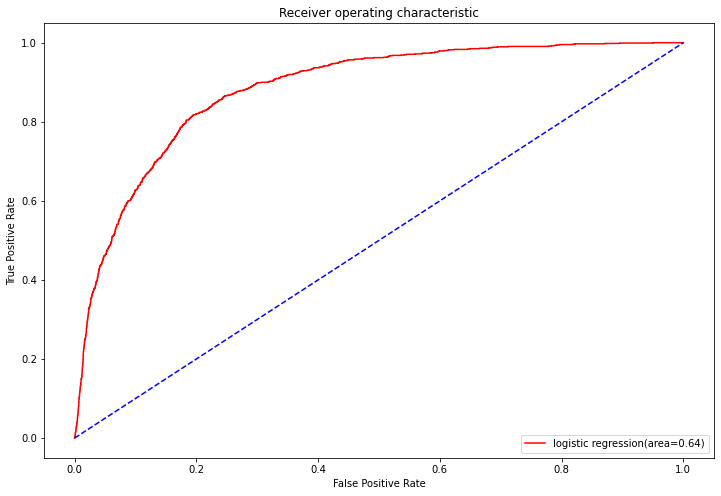

In [120]:
plt.subplots(figsize=[12, 8])
fpr, tpr, thresholds = roc_curve(test_y, prob)
plt.plot(fpr, tpr, color="red", label="logistic regression(area=%0.2f)"% Logit_roc_score)
plt.plot([0, 1], [0, 1], 'b--')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()